<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/R_C2_L6_Statistical_Analysis_Tests_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Back to R-Coding Course 2!**

In the previous lesson, we covered Data visualization using t-SNE. If you haven't completed these topics, please refer to [L05 - Data visualization using t-SNE](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/05-data-visualization-using-t-sne) before practicing the codes for this lesson.

# **Let's Recap!**

Now that we've covered essential concepts in [L06 - Statistical Analysis Tests](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/06-statistical-analysis-tests), let's take a moment to reinforce what we've learned so far. We'll start with a brief recap of the codes and techniques we've explored in the lesson.

# **Lesson Code Breakdown**

# **Apply Welch T-test on Gene Expression data for unpaired samples**

## **1. Load data**

In [ ]:
#Load data
input_data <- read.table('/content/wilcox-test.txt', sep="\t", row.names = 1, header=T)
head(input_data)

,ER.NOD.ERR1084805,ER.NOD.ERR1084806,ER.ATH.ERR1084764,ER.ATH.ERR1084765,TN.NOD.ERR1084798,TN.NOD.ERR1084799,TN.ATH.ERR1084768,TN.ATH.ERR1084766
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000001631,0.000000,0.00000,0.00000,1.84195,0.000000,0.0000000,0.000000,0.00000
ENSG00000002834,8.939160,9.99148,9.63534,9.62664,9.360420,9.0067800,6.679370,8.47874
ENSG00000003402,0.000000,0.00000,0.00000,1.05765,0.499162,0.0537453,0.288159,0.00000
ENSG00000003436,0.507206,0.00000,0.00000,0.00000,0.644542,0.0909436,0.000000,0.00000
ENSG00000004961,6.976450,5.88730,7.11399,7.31610,5.620400,7.6657200,6.197180,7.68596
ENSG00000005073,1.572660,0.00000,0.00000,0.00000,1.592180,2.1780800,7.211930,6.41045



This R code uses the read.table function to load data from a specified URL into a data frame named input_data. The data is in tab-separated format (sep="\t"), with the row names specified to be the first column (row.names = 1) and the header included (header=T). The head function is then used to display the first few rows of the loaded data frame, providing a quick preview of the dataset.

In [ ]:
print(input_data)

                   ER.NOD.ERR1084805 ER.NOD.ERR1084806 ER.ATH.ERR1084764
ENSG00000001631            0.0000000         0.0000000         0.0000000
ENSG00000002834            8.9391600         9.9914800         9.6353400
ENSG00000003402            0.0000000         0.0000000         0.0000000
ENSG00000003436            0.5072060         0.0000000         0.0000000
ENSG00000004961            6.9764500         5.8873000         7.1139900
ENSG00000005073            1.5726600         0.0000000         0.0000000
ENSG00000005102            0.9437260         0.0000000         0.0000000
ENSG00000005421            2.0101100         4.9863400         0.0000000
ENSG00000006016            0.0000000         0.0000000         0.0000000
ENSG00000006468            3.0202600         3.3905100         3.7946400
ENSG00000006555            0.0000000         0.0000000         0.0000000
ENSG00000006607            0.0000000         0.0000000         0.0000000
ENSG00000006634            7.0920900         7.1130

In [ ]:
dim(input_data)

[1] 2378    8

## **2. Extract gene Ids**

In [ ]:
#Extract genes Ids
genes <- as.data.frame(row.names(input_data))


This R code extracts the gene IDs from the row names of the input_data data frame and stores them in a new data frame named genes. The as.data.frame function is used to convert the row names into a separate data frame.

In [ ]:
head(genes)

,row.names(input_data)
,<chr>
1,ENSG00000001631
2,ENSG00000002834
3,ENSG00000003402
4,ENSG00000003436
5,ENSG00000004961
6,ENSG00000005073


# ***SYNTAX***

In [ ]:
t.test(input_data, mu = 3)


	One Sample t-test

data:  input_data
t = -135.23, df = 19023, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 3
95 percent confidence interval:
 1.057912 1.113408
sample estimates:
mean of x 
  1.08566 


## **3.Apply T test**

In [ ]:
# input_data = genes (rows) × samples (14 columns: 7 ER + 7 TN)

t.result <- apply(input_data[, 1:8], 1, function(x) {
  t.test(x[1:4], x[5:8], paired = FALSE)   # Welch's t-test
})



This R code applies Welch's t-test to each row (gene) in the specified columns (1 to 8) of the input_data data frame. The apply function is used with MARGIN = 1 to apply the t.test function row-wise. The test compares the means of the first four samples with the means of the last four samples for each gene. The results are stored in the t.result object.

In [ ]:
head(t.result)

$ENSG00000001631

	Welch Two Sample t-test

data:  x[1:4] and x[5:8]
t = 1, df = 3, p-value = 0.391
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.004989  1.925964
sample estimates:
mean of x mean of y 
0.4604875 0.0000000 


$ENSG00000002834

	Welch Two Sample t-test

data:  x[1:4] and x[5:8]
t = 1.8378, df = 3.8043, p-value = 0.1436
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6322682  2.9659232
sample estimates:
mean of x mean of y 
 9.548155  8.381327 


$ENSG00000003402

	Welch Two Sample t-test

data:  x[1:4] and x[5:8]
t = 0.18783, df = 4.0928, p-value = 0.86
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7391185  0.8474104
sample estimates:
mean of x mean of y 
0.2644125 0.2102666 


$ENSG00000003436

	Welch Two Sample t-test

data:  x[1:4] and x[5:8]
t = -0.28493, df = 5.7727, p-value = 0.7856
alternative hypo

## **4. Extract p-values from the results**

In [ ]:
#Extract P-value
p_value <- unlist(lapply(t.result, function(x) x$p.value))

In [ ]:
head(p_value)

ENSG00000001631 ENSG00000002834 ENSG00000003402 ENSG00000003436 ENSG00000004961 
     0.39100222      0.14362394      0.85995635      0.78564232      0.96148810 
ENSG00000005073 
     0.06617066

This R code extracts the p-values from the results of Welch's t-test stored in the t.result object. The lapply function is used to apply a function to each element of t.result, and the extracted p-values are stored in the p_value object using unlist.

## **5. Extract FDR values from the results**

In [ ]:
#False Discovery Rate (FDR)
fdr <- p.adjust(p_value, method = "fdr")

This R code computes the False Discovery Rate (FDR) adjusted p-values using the p.adjust function. The initial p-values stored in the p_value object are adjusted using the Benjamini-Hochberg method, specified by method = "fdr". The adjusted p-values are then stored in the fdr object.

In [ ]:
head(fdr)

ENSG00000001631 ENSG00000002834 ENSG00000003402 ENSG00000003436 ENSG00000004961 
      0.5459796       0.5459796       0.9100918       0.8685530       0.9771020 
ENSG00000005073 
      0.5459796

## **6. Extract Bonferroni-adjusted P-value from the results**

In [ ]:
#Bonferroni-adjusted P-value
boneferroni <- p.adjust(p_value, method = "bonferroni")


This R code computes the Bonferroni-adjusted p-values using the p.adjust function. The initial p-values stored in the p_value object are adjusted using the Bonferroni correction, specified by method = "bonferroni". The adjusted p-values are then stored in the bonferroni object.

In [ ]:
head(boneferroni)

ENSG00000001631 ENSG00000002834 ENSG00000003402 ENSG00000003436 ENSG00000004961 
              1               1               1               1               1 
ENSG00000005073 
              1

## **7. Calculate Log2 FC (fold change)**

In [ ]:
# Mean expression of each gene in ER (cancer) group
Group1 <- apply(input_data[, 1:4], 1, mean)

# Mean expression of each gene in TN (normal) group
Group2 <- apply(input_data[, 5:8], 1, mean)



FC <- as.data.frame(Group2/Group1)


#take log of fold change
Log_FC <- log(FC+1)


This R code calculates the mean expression values for each gene in two different groups: "Group1" representing a cancer group (columns 1 to 4 of input_data) and "Group2" representing a normal group (columns 5 to 8 of input_data). The fold change (FC) is computed as the ratio of mean expression in the normal group to the mean expression in the cancer group. The as.data.frame function is used to convert the resulting fold change values into a data frame. Finally, the logarithm (base 2) of the fold change is calculated and stored in the Log_FC data frame.

In [ ]:
head(FC)

,Group2/Group1
,<dbl>
ENSG00000001631,0.0000000
ENSG00000002834,0.8777955
ENSG00000003402,0.7952218
ENSG00000003436,1.4500728
ENSG00000004961,0.9954356
ENSG00000005073,11.0593771


In [ ]:
head(Log_FC)

,Group2/Group1
,<dbl>
ENSG00000001631,0.0000000
ENSG00000002834,0.6300985
ENSG00000003402,0.5851286
ENSG00000003436,0.8961177
ENSG00000004961,0.6908624
ENSG00000005073,2.4898425


## **8. Add p-value, FDR and Bonferroni-adjusted P-value into a list**

In [ ]:
# make list
list_t <- Map(c, p_value, fdr, boneferroni, Log_FC)


This R code creates a list named list_t using the Map function. It combines four vectors: p_value, fdr, boneferroni, and Log_FC into a list where each element of the list corresponds to the corresponding values for a particular gene.

## **9. Make dataframe of the list.**

In [ ]:
#make dataframe of the list
result_t<- data.frame(matrix(unlist(list_t), nrow=length(list_t), byrow=T))


This R code creates a data frame named result_t from the list list_t. The unlist function is used to flatten the list into a vector, and then the matrix function is applied to arrange the values in a matrix format with the specified number of rows (nrow) and by filling the matrix by row (byrow=T). Finally, a data frame is created from this matrix.

## **10. Combined genes with these t-statistics values.**

In [ ]:
#Bind with the gene
result_t1 <-cbind(genes,result_t )


This R code combines the gene IDs from the genes data frame with the statistical results stored in the result_t data frame using the cbind function. The resulting data frame is named result_t1, where each row corresponds to a gene, and the columns include gene IDs, p-values, FDR-adjusted p-values, Bonferroni-adjusted p-values, and logarithm of fold changes.

In [ ]:
head(result_t)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X2372,X2373,X2374,X2375,X2376,X2377,X2378,X2379,X2380,X2381
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.39100222,0.5459796,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,2.641861,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
2,0.14362394,0.5459796,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,2.641861,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
3,0.85995635,0.9100918,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,2.641861,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
4,0.78564232,0.8685530,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,2.641861,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
5,0.96148810,0.9771020,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,2.641861,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
6,0.06617066,0.5459796,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,2.641861,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf


## **11. Add column names**

In [ ]:
#Provide the column names to both groups
colnames(result_t1) <- c("Gene_ID","P-value","FDR","Boneferroni P-value", "LogFC")


This R code assigns column names ("Gene_ID", "P-value", "FDR", "Boneferroni P-value", "LogFC") to the result_t1 data frame, specifying the respective information represented by each column.

## **12. Write t-test results into a file.**

In [ ]:
#Write results into a file
write.table(result_t1,file="T-test_result.txt", sep='\t',  quote = F,row.names = TRUE)

In [ ]:
write.csv(result_t1, "result.csv")


This R code writes the result_t1 data frame into a tab-separated text file named "T-test_result.txt" using the write.table function. The sep='\t' argument specifies the use of tab as the delimiter, and quote = F ensures that quotes are not used around character fields. Additionally, row.names = FALSE is set to exclude row names in the output file.

In [ ]:
head(result_t1)

,Gene_ID,P-value,FDR,Boneferroni P-value,LogFC,NA,NA.1,NA.2,NA.3,NA.4,⋯,NA,NA.1,NA.2,NA.3,NA.4,NA.5,NA.6,NA.7,NA.8,NA.9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000001631,0.39100222,0.5459796,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
2,ENSG00000002834,0.14362394,0.5459796,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
3,ENSG00000003402,0.85995635,0.9100918,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
4,ENSG00000003436,0.78564232,0.8685530,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
5,ENSG00000004961,0.96148810,0.9771020,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
6,ENSG00000005073,0.06617066,0.5459796,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf



This R code uses the ggplot2 library to create a volcano plot based on the results stored in the result_t1 data frame. The plot is defined with LogFC values on the x-axis and the negative logarithm (base 10) of FDR-adjusted p-values on the y-axis. The geom_point() function adds points to the plot. The resulting plot provides a visualization of the fold change versus statistical significance for each gene.

# **Apply Wilcoxon rank test or T-test**

## **1. Load data**

In [ ]:
#Load data
input_data <- read.table('/content/wilcox-test.txt', sep="\t", row.names = 1, header=T)
head(input_data)

,ER.NOD.ERR1084805,ER.NOD.ERR1084806,ER.ATH.ERR1084764,ER.ATH.ERR1084765,TN.NOD.ERR1084798,TN.NOD.ERR1084799,TN.ATH.ERR1084768,TN.ATH.ERR1084766
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000001631,0.000000,0.00000,0.00000,1.84195,0.000000,0.0000000,0.000000,0.00000
ENSG00000002834,8.939160,9.99148,9.63534,9.62664,9.360420,9.0067800,6.679370,8.47874
ENSG00000003402,0.000000,0.00000,0.00000,1.05765,0.499162,0.0537453,0.288159,0.00000
ENSG00000003436,0.507206,0.00000,0.00000,0.00000,0.644542,0.0909436,0.000000,0.00000
ENSG00000004961,6.976450,5.88730,7.11399,7.31610,5.620400,7.6657200,6.197180,7.68596
ENSG00000005073,1.572660,0.00000,0.00000,0.00000,1.592180,2.1780800,7.211930,6.41045



This R code uses the read.table function to load data from a specified URL into a data frame named input_data. The data is in tab-separated format (sep="\t"), with the row names specified to be the first column (row.names = 1) and the header included (header=T). The loaded data frame is assigned the name input_data.

In [ ]:
# Check dimensions: should be genes (rows) × 14 samples (columns)
dim(input_data)

[1] 2378    8

## **2. Extract gene ids.**

In [ ]:
genes <- as.data.frame(row.names(input_data))


This R code extracts the gene IDs from the row names of the input_data data frame and stores them in a new data frame named genes. The as.data.frame function is used to convert the row names into a separate data frame.

## **3. Apply Wilcoxon Rank test.**



In [ ]:
# Turn off warnings globally
options(warn = -1)
#Apply wilcoxon t-test
Wilcoxon <- apply(input_data[,1:8], 1, function (x) wilcox.test(x[1:4],x[5:8],paired=F))


This R code turns off warnings globally using options(warn = -1) to suppress warning messages. Then, it applies the Wilcoxon rank-sum test (also known as the Mann-Whitney U test) to each row (gene) in the specified columns (1 to 8) of the input_data data frame. The apply function is used with MARGIN = 1 to apply the wilcox.test function row-wise. The test compares the distributions of the first four samples with the last four samples for each gene. The results are stored in the Wilcoxon object.

## **4. Extract p-value from the results**

In [ ]:
#Extract p-value
p_value_w <- unlist(lapply(Wilcoxon, function(x) x$p.value))


This R code extracts the p-values from the results of the Wilcoxon rank-sum test stored in the Wilcoxon object. The lapply function is used to apply a function to each element of Wilcoxon, and the extracted p-values are stored in the p_value_w object using unlist.

## **5. Extract FDR from the results.**

In [ ]:
#Extract FDR
fdr_w <- p.adjust(p_value_w, method = "fdr")


This R code computes the False Discovery Rate (FDR) adjusted p-values using the p.adjust function. The initial p-values stored in the p_value_w object are adjusted using the Benjamini-Hochberg method, specified by method = "fdr". The adjusted p-values are then stored in the fdr_w object.

## **6. Extract Boneferroni adjusted p-value from the results.**

In [ ]:
#Extract Boneferroni p-value
boneferroni_w <- p.adjust(p_value_w, method = "bonferroni")


This R code applies Bonferroni correction to raw p-values (p_value_w) using p.adjust. The resulting boneferroni_w object holds the adjusted p-values, ensuring robust control of family-wise error in multiple comparisons.

## **7. Calculate Log2 FC (fold change).**

In [ ]:
#calculate the mean of each gene per cancer group group
Group1 = apply(input_data[,1:4], 1, mean)

#calcuate the mean of each gene per normal group
Group2 = apply(input_data[, 5:8], 1, mean)


FC <- as.data.frame(Group2/Group1)

#take log of fold change
Log_FC <- log(FC+1)


This R code calculates the mean expression for each gene in two groups: 'Group1' for cancer groups (columns 1 to 4 in input_data) and 'Group2' for normal groups (columns 5 to 8). It then computes the fold change (FC) for each gene by dividing Group2 mean by Group1 mean. Finally, the logarithm of the fold change (Log_FC) is taken, ensuring a meaningful representation of gene expression differences.

## **8. Make a list of t-statistics values.**

In [ ]:
list_w <- Map(c, p_value_w, fdr_w, boneferroni_w, Log_FC)


This R code uses the Map function to create a list (list_w) by combining corresponding elements from the vectors p_value_w, fdr_w, boneferroni_w, and Log_FC using the c function. Each list element contains the values associated with a specific statistical measure for a gene.

## **9. Make Data frame of the list.**

In [ ]:
#Extract Results
result_w<- data.frame(matrix(unlist(list_w), nrow=length(list_w), byrow=T))


This R code extracts results from the list list_w and organizes them into a data frame (result_w). It utilizes the matrix and unlist functions to convert the list into a matrix and then flatten it into a single-column data frame, ensuring a structured presentation of statistical results for further analysis or visualization.

## **10. Combined genes with these t-statistics values.**

In [ ]:
#Create results with genes
result_w1 <-cbind(genes,result_w )


This R code combines the matrix of statistical results (result_w) with a vector or data frame containing gene information (genes) using the cbind function. The resulting data frame (result_w1) includes both gene identifiers and associated statistical measures for subsequent analysis or interpretation.

## **11. Add column names.**

In [ ]:
#Provide the column names to both groups
colnames(result_w1) <- c("Gene_ID","P-value","FDR","Boneferroni P-value", "LogFC")

This R code assigns column names to the data frame result_w1, specifying labels for each column. The column names are set as "Gene_ID," "P-value," "FDR," "Boneferroni P-value," and "LogFC," providing clear identification of the information contained in each column.

## **12. Write results into a table.**

In [ ]:
#Create results table
write.table(result_w1,file="Wilcoxon_test_result.txt", sep='\t',  quote = F,row.names = FALSE)


This R code generates a results table by writing the contents of the data frame result_w1 to a tab-separated text file named "Wilcoxon_test_result.txt." The write.table function is used with the specified file name, separator (sep='\t' for tab-separated), no quoting of values (quote = F), and excluding row names (row.names = FALSE). The resulting file can be further analyzed or shared as needed.

In [ ]:
head(result_w1)

,Gene_ID,P-value,FDR,Boneferroni P-value,LogFC,NA,NA.1,NA.2,NA.3,NA.4,⋯,NA,NA.1,NA.2,NA.3,NA.4,NA.5,NA.6,NA.7,NA.8,NA.9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000001631,0.45325470,0.6377750,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
2,ENSG00000002834,0.11428571,0.6377750,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
3,ENSG00000003402,0.53847238,0.7250778,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
4,ENSG00000003436,0.61983912,0.8081017,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
5,ENSG00000004961,0.88571429,0.9967953,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf
6,ENSG00000005073,0.02651872,0.6187229,1,0,0.6300985,0.5851286,0.8961177,0.6908624,2.489843,⋯,0.03789014,0.2661159,0.8555953,0.6397773,0.9170969,Inf,1.037329,0.5699453,0.2539416,Inf


# **ANOVA**

## **1. Load data**

In [ ]:
#Load data
data <- read.table('https://raw.githubusercontent.com/pine-bio-support/Statistical-analysis/main/ANOVA_Example_Gene_Exp_data.txt', sep='\t', header=TRUE, check.names=FALSE, stringsAsFactors=TRUE, row.names=1)

This R code loads gene expression data from a tab-separated file hosted on GitHub using the read.table function. The data is organized as a data frame named data, with rows representing genes and columns representing different experimental conditions. Column names are preserved, and the first column is used as row names. The check.names=FALSE parameter ensures that non-standard column names are accepted, and stringsAsFactors=TRUE converts character columns to factors by default.

In [ ]:
head(data)

,Group,ENSG00000156508,ENSG00000205542,ENSG00000105193,ENSG00000167553,ENSG00000070756,ENSG00000198938,ENSG00000143947,ENSG00000174444,ENSG00000235655,ENSG00000163041,ENSG00000123416,ENSG00000239264,ENSG00000168385,ENSG00000002834,ENSG00000170144,ENSG00000135720,ENSG00000188612,ENSG00000263585,ENSG00000196531
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ER-NOD-ERR1084805,ER-NOD,12.0471,12.4469,11.0584,11.7512,10.8978,10.85810,10.26700,10.64150,9.91440,10.55740,10.27420,9.18108,9.34603,8.93916,8.88573,8.72652,8.38619,7.90317,8.01929
ER-NOD-ERR1084806,ER-NOD,11.1459,10.8934,11.3955,11.3593,11.7360,10.65260,9.99719,9.90232,10.42740,10.24070,9.55431,8.44210,8.53939,9.99148,8.13640,7.27072,9.29474,9.45581,8.70478
ER-ATH-ERR1084764,ER-ATH,12.1216,10.6062,10.8931,11.4747,11.3341,11.24500,9.97260,10.25420,9.87619,9.98192,10.23780,9.57871,9.79895,9.63534,9.30514,9.52390,9.18152,9.23725,8.52379
ER-ATH-ERR1084765,ER-ATH,12.0039,11.3613,10.6384,11.5166,11.2880,11.19870,10.04530,9.90199,10.18000,10.36260,10.17560,9.42366,9.94174,9.62664,9.51849,9.70915,9.24117,9.46953,8.82153
TN-NOD-ERR1084798,TN-NOD,12.4719,11.3002,12.3713,10.7940,10.7005,9.22284,11.40980,11.16580,9.82939,9.42897,9.66880,9.05466,9.04463,9.36042,8.73769,8.41457,8.63161,8.74281,8.42867
TN-NOD-ERR1084799,TN-NOD,11.2197,13.3302,11.9196,11.2947,10.6710,11.74120,9.75804,9.65232,9.88684,9.50917,9.52279,9.91078,9.04079,9.00678,8.78671,8.82747,8.56840,8.28574,7.43808


## **2. Create file.**

In [ ]:
#Create file with file names
write.table(cbind("Gene","group","P-value"),file="Anova_results.txt",row.names=F,col.names=F,sep = '\t');


This R code creates a file named "Anova_results.txt" and writes the column names "Gene," "group," and "P-value" to the file. The cbind function is used to combine these column names into a matrix, and the write.table function is then employed to write this matrix to the specified file in tab-separated format, with row and column names excluded.

## **3. create ANOVA formula.**

In [ ]:
#Create Anova formula, i.e. find relationship between gene with genes
baseformula <- " ~ Group"
for (i in 2:ncol(data)) {
formula <- paste(colnames(data)[i], baseformula, sep="")

#Extract p-value for each gene
p <- summary(aov(as.formula(formula), data=data))[[1]][["Pr(>F)"]][1]

result_anova <- (paste(formula, ": p=", p, sep=""))

#Write/Append results into a file
write.table(result_anova, file="Anova_results.txt",row.names=F,col.names=F,sep = '\t',append = T)
}


This R code creates an analysis of variance (ANOVA) formula to examine the relationship between genes and groups in the provided data. It iterates through each gene column, fits an ANOVA model using the specified formula, and extracts the p-value. The results, including the formula and corresponding p-value, are then appended to the "Anova_results.txt" file.

In [ ]:
head(result_anova)

[1] "ENSG00000196531 ~ Group: p=0.565973684592326"

# **Correlation**

## **1. install packages.**

In [ ]:
#Load libraries
install.packages("Hmisc")
install.packages("corrplot")
library(Hmisc)
library(corrplot)
source("http://www.sthda.com/upload/rquery_cormat.r")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘colorspace’, ‘Formula’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


corrplot 0.95 loaded




This R code installs and loads the "Hmisc" and "corrplot" packages. Additionally, it sources an external script for creating correlation matrices, enhancing the capability for advanced statistical analyses and visualization of correlation patterns in the data.

## **2. Load data**

In [ ]:
#Load data
data <- read.table("https://raw.githubusercontent.com/pine-bio-support/Statistical-analysis/main/Correlation_Example_data.txt", sep="\t", row.names = 1, header=T)
#Check Dimensions of the data
dim(data)

[1] 19  8


This R code loads tabular data from a URL into a data frame named data. The data is organized with row names in the first column and includes headers. Subsequently, the dim function is used to check and display the dimensions (number of rows and columns) of the loaded data.

## **3. Transpose data.**

In [ ]:
#Transpose the data
data_t <-t(data)


This R code transposes the data in the data data frame, creating a new data frame named data_t. The t() function is applied to switch the rows and columns, effectively exchanging the rows with columns and vice versa in the dataset.

In [ ]:
head(data_t)

,ENSG00000156508,ENSG00000205542,ENSG00000105193,ENSG00000167553,ENSG00000070756,ENSG00000198938,ENSG00000143947,ENSG00000174444,ENSG00000235655,ENSG00000163041,ENSG00000123416,ENSG00000239264,ENSG00000168385,ENSG00000002834,ENSG00000170144,ENSG00000135720,ENSG00000188612,ENSG00000263585,ENSG00000196531
ER.NOD.ERR1084805,12.0471,12.4469,11.0584,11.7512,10.8978,10.85810,10.26700,10.64150,9.91440,10.55740,10.27420,9.18108,9.34603,8.93916,8.88573,8.72652,8.38619,7.90317,8.01929
ER.NOD.ERR1084806,11.1459,10.8934,11.3955,11.3593,11.7360,10.65260,9.99719,9.90232,10.42740,10.24070,9.55431,8.44210,8.53939,9.99148,8.13640,7.27072,9.29474,9.45581,8.70478
ER.ATH.ERR1084764,12.1216,10.6062,10.8931,11.4747,11.3341,11.24500,9.97260,10.25420,9.87619,9.98192,10.23780,9.57871,9.79895,9.63534,9.30514,9.52390,9.18152,9.23725,8.52379
ER.ATH.ERR1084765,12.0039,11.3613,10.6384,11.5166,11.2880,11.19870,10.04530,9.90199,10.18000,10.36260,10.17560,9.42366,9.94174,9.62664,9.51849,9.70915,9.24117,9.46953,8.82153
TN.NOD.ERR1084798,12.4719,11.3002,12.3713,10.7940,10.7005,9.22284,11.40980,11.16580,9.82939,9.42897,9.66880,9.05466,9.04463,9.36042,8.73769,8.41457,8.63161,8.74281,8.42867
TN.NOD.ERR1084799,11.2197,13.3302,11.9196,11.2947,10.6710,11.74120,9.75804,9.65232,9.88684,9.50917,9.52279,9.91078,9.04079,9.00678,8.78671,8.82747,8.56840,8.28574,7.43808


## **4. Calculate the correlation coefficient between genes.**
Method can be any one of them ("pearson", "kendall", "spearman"))

In [ ]:
#Calculate the correlation coefficient between genes
result<- rquery.cormat(data_t, type="flatten", graph=FALSE, method = "pearson")

In [ ]:
head(result)


row,column,cor,p
<chr>,<chr>,<dbl>,<dbl>
ENSG00000239264,ENSG00000168385,0.260,5.4e-01
ENSG00000239264,ENSG00000170144,0.510,2.0e-01
ENSG00000168385,ENSG00000170144,0.810,1.5e-02
ENSG00000239264,ENSG00000135720,0.620,1.0e-01
ENSG00000168385,ENSG00000135720,0.840,9.5e-03
ENSG00000170144,ENSG00000135720,0.980,2.6e-05
ENSG00000239264,ENSG00000156508,0.100,8.1e-01
ENSG00000168385,ENSG00000156508,0.480,2.3e-01
ENSG00000170144,ENSG00000156508,0.300,4.7e-01



This R code calculates the correlation coefficients between genes in the transposed dataset data_t. The rquery.cormat function is used with the "pearson" method, which computes Pearson correlation coefficients. The result is stored in the variable result. The type="flatten" parameter indicates that the output should be a flattened vector of correlation values rather than a matrix, and graph=FALSE disables any graphical representation of the correlation matrix.

In [ ]:
#Calculate the correlation coefficient between genes
result_qq<- rquery.cormat(data_t, type="flatten", graph=FALSE, method = "kendall")

In [ ]:
head(result_qq)

row,column,cor,p
<chr>,<chr>,<dbl>,<dbl>
ENSG00000105193,ENSG00000174444,0.071,0.900
ENSG00000105193,ENSG00000156508,0.140,0.720
ENSG00000174444,ENSG00000156508,0.360,0.280
ENSG00000105193,ENSG00000143947,-0.071,0.900
ENSG00000174444,ENSG00000143947,0.290,0.400
ENSG00000156508,ENSG00000143947,0.360,0.280
ENSG00000105193,ENSG00000002834,0.071,0.900
ENSG00000174444,ENSG00000002834,0.140,0.720
ENSG00000156508,ENSG00000002834,-0.210,0.550


## **5. Extract correlation coefficient and p-values values.**

In [ ]:
#Extract correlation and p-values values
corr_result <- result$r


This R code extracts the correlation coefficients from the previously calculated correlation result. The correlation values are stored in the variable corr_result. The $r notation is used to access the correlation values from the output of the rquery.cormat function.

## **6. Plot correlation matrix.**

$r
                ENSG00000239264 ENSG00000168385 ENSG00000170144 ENSG00000135720
ENSG00000239264               1            0.26            0.51            0.62
ENSG00000168385                               1            0.81            0.84
ENSG00000170144                                               1            0.98
ENSG00000135720                                                               1
ENSG00000156508                                                                
ENSG00000174444                                                                
ENSG00000143947                                                                
ENSG00000196531                                                                
ENSG00000205542                                                                
ENSG00000105193                                                                
ENSG00000070756                                                                
ENSG00000263585                      

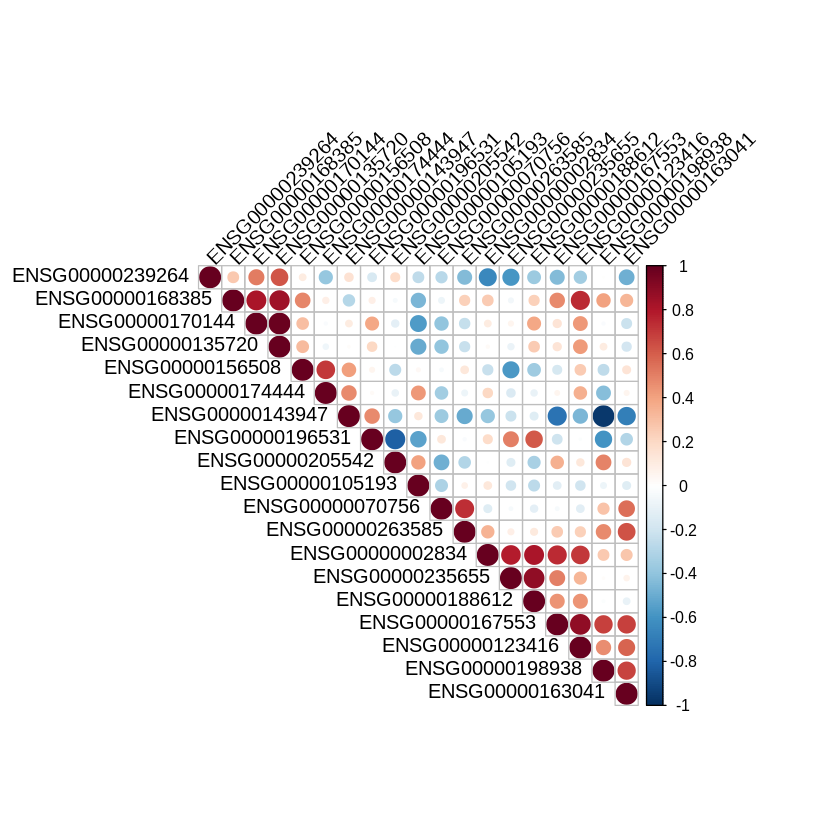

In [ ]:
#To plot correlation matrix
rquery.cormat(data_t, type="upper")


This R code uses the rquery.cormat function to plot the upper triangle of the correlation matrix for the transposed dataset data_t. The type="upper" parameter specifies that only the upper part of the correlation matrix should be displayed in the plot. This visualization provides a graphical representation of the pairwise correlations between genes.

## **7. Write results into a table/file.**

In [ ]:
#Write results in the form a table with correlation coefficient and  p-value
write.table(corr_result,file="corr_result.txt", sep='\t',  quote = F,row.names = FALSE)


This R code writes the correlation coefficients extracted earlier (corr_result) to a tab-separated text file named "corr_result.txt". The write.table function is utilized with the specified file name, separator (sep='\t' for tab-separated), no quoting of values (quote = F), and excluding row names (row.names = FALSE). The resulting file contains the correlation coefficients and is suitable for further analysis or reporting.

# **Regression**

# **Simple linear regression model.**

## **1. Load data**

In [ ]:
#Load data
data <- read.table("https://raw.githubusercontent.com/pine-bio-support/Statistical-analysis/main/Regression-example.txt", header=TRUE, sep="\t", row.names=1)
#Check dimensions of data
dim(data)

[1] 12  3

This R code loads tabular data from a URL into a data frame named data. The data includes headers, and row names are assigned from the first column. Subsequently, the dim function is used to check and display the dimensions (number of rows and columns) of the loaded data.

## **2. Create linear regression model.**

In [ ]:
#Create the linear regression
reg_model = lm(height~age, data = data)


This R code creates a linear regression model using the lm function. The dependent variable is "height," and the independent variable is "age" in the dataset specified by data. The resulting linear regression model is stored in the object reg_model for further analysis or extraction of information.

In [ ]:
lm(hwight`weight, data =data)

## **3. Extract Height and age from the data.**

In [ ]:
data[,2:3]

In [ ]:
#Extract height and age column from data
data1 <- data[,1:2]
head(data1)

,age,height
,<int>,<dbl>
1,18,76.1
2,19,77.0
3,20,78.1
4,21,78.2
5,22,78.8
6,23,79.7



This R code extracts the "height" and "age" columns from the original dataset, creating a new data frame named data1. The subset of data displayed using head(data1) shows the first few rows of the selected columns for examination or further analysis.

## **4. Plot data.**

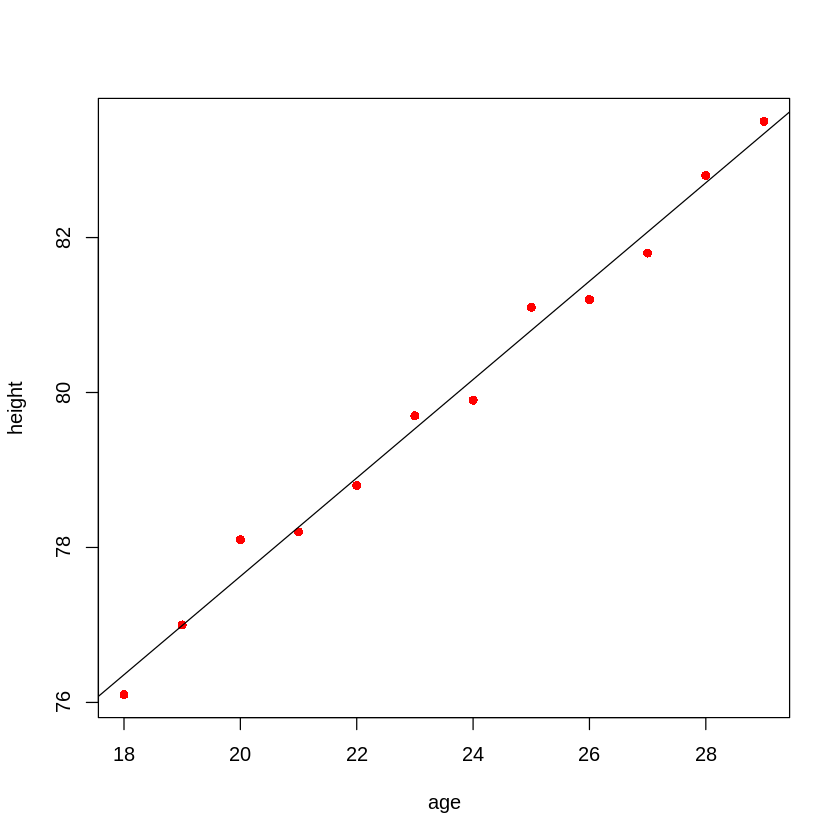

In [ ]:
#Plot the results
plot(data1, pch = 16, col = "red")

#Add a regression line
abline(reg_model)


This R code creates a scatter plot using the "height" and "age" columns from the data1 data frame. The points are represented by blue circles (pch = 16). Additionally, a regression line based on the previously created linear regression model (reg_model) is added to the plot using the abline function. The resulting plot visually displays the relationship between age and height, along with the fitted regression line.

# **Multi-linear regression model**

## **1. Load data.**

In [ ]:
#Load data
data <- read.table("https://raw.githubusercontent.com/pine-bio-support/Statistical-analysis/main/Regression-example.txt", header=TRUE, sep="\t", row.names=1)
#Check dimensions of data
dim(data)

[1] 12  3

This R code reads the data from the specified URL into a data frame named data and then checks and displays the dimensions (number of rows and columns) of the loaded data.

## **2. Create linear regression with multiple variable (here is two variables).**

In [ ]:
#Create a linear regression with two variables
model_reg_m = lm(height~age + weight, data = data)


This R code creates a multiple linear regression model using the lm function. The dependent variable is "height," and the independent variables are "age" and "weight" in the dataset specified by data. The resulting multiple linear regression model is stored in the object model_reg_m for further analysis or extraction of information.

## **3. Summaries regression model results.**

In [ ]:
#view the results
summary(model_reg_m)


Call:
lm(formula = height ~ age + weight, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27372 -0.20293  0.02432  0.17464  0.37299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 64.92797    0.49978 129.914 4.82e-16 ***
age          0.48282    0.13270   3.638  0.00541 ** 
weight       0.06044    0.05205   1.161  0.27542    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2516 on 9 degrees of freedom
Multiple R-squared:  0.9902,	Adjusted R-squared:  0.9881 
F-statistic:   456 on 2 and 9 DF,  p-value: 9.014e-10



This R code displays a summary of the multiple linear regression model (model_reg_m). The summary function provides information about the coefficients, standard errors, t-statistics, p-values, and other relevant statistics associated with the model. This summary is useful for assessing the significance and strength of the relationships between the dependent variable ("height") and the independent variables ("age" and "weight").

## **4. Plot data.**

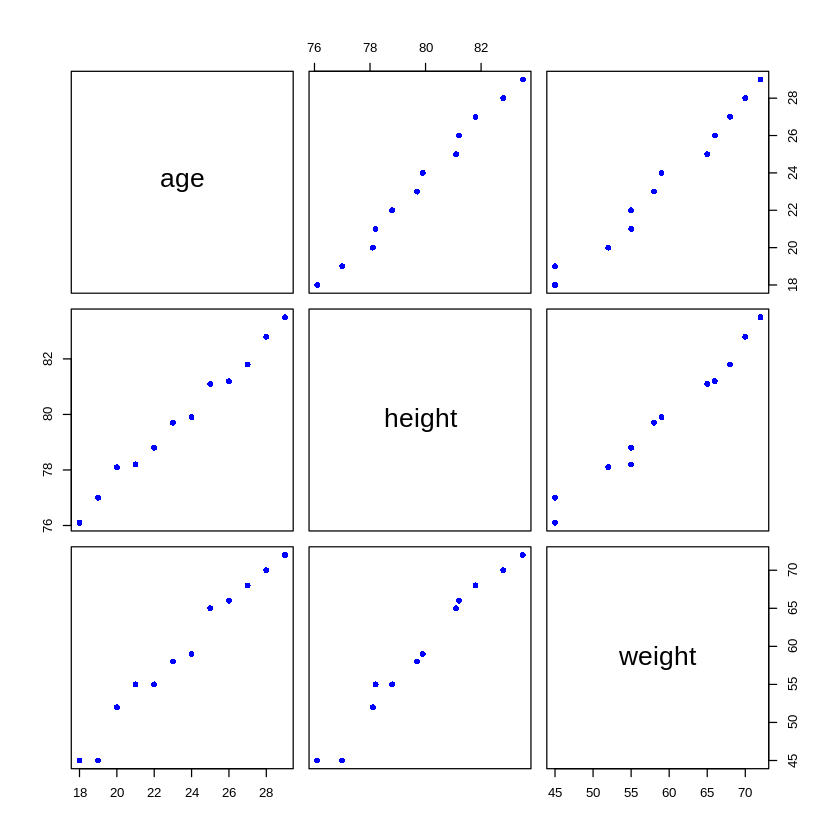

In [ ]:
#Plot the results
plot(data, pch = 16, col = "blue")

This code creates a scatter plot where the x-axis represents "age," the y-axis represents "height," and points are represented by blue circles. You can modify the code accordingly if you want to plot against "weight" or if you have a specific combination of variables in mind.